<a href="https://colab.research.google.com/github/mahault/Bayesian-hyper-tuning/blob/main/Bayesian_hyper_parameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-optimize ace_tools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.4 MB/s eta 0:00:00


Best hyperparameters found: p1=6, p2=13 with score=0.7796


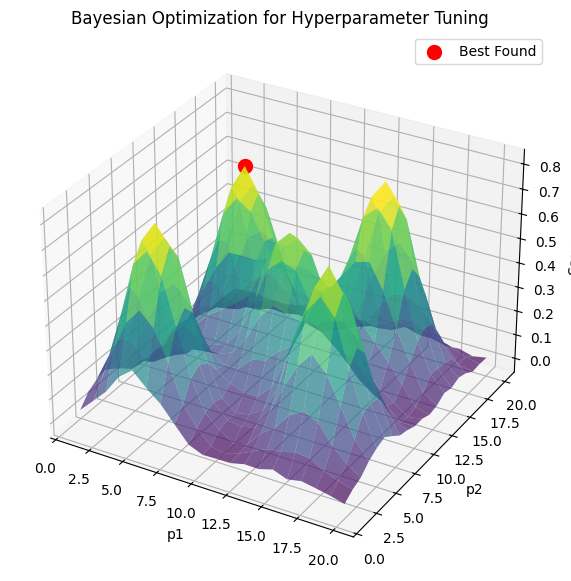

In [2]:
# Re-import necessary libraries since execution state was reset
import numpy as np
import matplotlib.pyplot as plt
from skopt import gp_minimize
from skopt.space import Integer
from skopt.utils import use_named_args
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')



# Recreate the terrain function
def create_terrain():
    """Create a 20x20 terrain with multiple peaks."""
    np.random.seed(42)
    size = 20
    x = np.arange(size)
    y = np.arange(size)
    X, Y = np.meshgrid(x, y)

    terrain = np.zeros((size, size), dtype=float)
    centers = [(3, 4), (5, 15), (12, 5), (14, 14), (9, 10)]
    amplitudes = [0.78, 0.7, 0.75, 0.8, 0.65]
    sigma = 2.0

    for (cx, cy), amp in zip(centers, amplitudes):
        gauss = amp * np.exp(-((X - cx) ** 2 + (Y - cy) ** 2) / (2 * sigma ** 2))
        terrain += gauss

    terrain += 0.03 * np.random.rand(size, size)
    min_val, max_val = terrain.min(), terrain.max()
    terrain = (terrain - min_val) / (max_val - min_val) * 0.8

    logging.info("Terrain created successfully with multiple peaks.")

    return terrain

# Define global terrain grid
grid = create_terrain()

# Define the simulation function
# def simulate_model(p1, p2):
#     """Return the 'score' from the terrain grid for hyperparameters p1, p2."""
#     return grid[p1 - 1, p2 - 1]

def simulate_model(p1, p2):
    """Return the 'score' from the terrain grid for hyperparameters p1, p2."""
    score = grid[p1 - 1, p2 - 1]
    logging.info(f"Evaluating model at (p1={p1}, p2={p2}) -> Score: {score:.4f}")
    return score

# Define the hyperparameter space
space = [Integer(1, 20, name='p1'), Integer(1, 20, name='p2')]

# Define the objective function for Bayesian Optimization
@use_named_args(space)
def objective(p1, p2):
    """Objective function to be optimized."""
    logging.info(f"Running Bayesian Optimization step with (p1={p1}, p2={p2})")
    return -simulate_model(p1, p2)  # Minimize negative score to maximize performance

# Perform Bayesian Optimization
logging.info("Starting Bayesian Optimization...")
res_gp = gp_minimize(objective, space, n_calls=30, random_state=42)
logging.info("Bayesian Optimization complete.")

# Extract best found parameters
best_p1, best_p2 = res_gp.x
best_value = -res_gp.fun  # Convert back to positive
logging.info(f"Best hyperparameters found: p1={best_p1}, p2={best_p2} with score={best_value:.4f}")



# Print results
print(f"Best hyperparameters found: p1={best_p1}, p2={best_p2} with score={best_value:.4f}")

# Visualizing results
logging.info("Generating 3D visualization of results...")
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid of hyperparameter space
X, Y = np.meshgrid(range(1, 21), range(1, 21))
Z = np.array([[simulate_model(x, y) for x in range(1, 21)] for y in range(1, 21)])

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
ax.scatter(best_p1, best_p2, best_value, color='red', s=100, marker='o', label="Best Found")

ax.set_xlabel('p1')
ax.set_ylabel('p2')
ax.set_zlabel('Score')
ax.set_title('Bayesian Optimization for Hyperparameter Tuning')
ax.legend()
plt.show()

logging.info("Visualization complete.")


Terrain created successfully with multiple peaks.
Starting Bayesian Optimization...
Running Bayesian Optimization step with (p1=16, p2=4)
Evaluating model at (p1=16, p2=4) -> Score: 0.4379
Running Bayesian Optimization step with (p1=16, p2=12)
Evaluating model at (p1=16, p2=12) -> Score: 0.2514
Running Bayesian Optimization step with (p1=9, p2=3)
Evaluating model at (p1=9, p2=3) -> Score: 0.1090
Running Bayesian Optimization step with (p1=10, p2=7)
Evaluating model at (p1=10, p2=7) -> Score: 0.2248
Running Bayesian Optimization step with (p1=4, p2=13)
Evaluating model at (p1=4, p2=13) -> Score: 0.4494
Running Bayesian Optimization step with (p1=2, p2=15)
Evaluating model at (p1=2, p2=15) -> Score: 0.0861
Running Bayesian Optimization step with (p1=19, p2=1)
Evaluating model at (p1=19, p2=1) -> Score: 0.0175
Running Bayesian Optimization step with (p1=20, p2=13)
Evaluating model at (p1=20, p2=13) -> Score: 0.0285
Running Bayesian Optimization step with (p1=13, p2=1)
Evaluating model at 

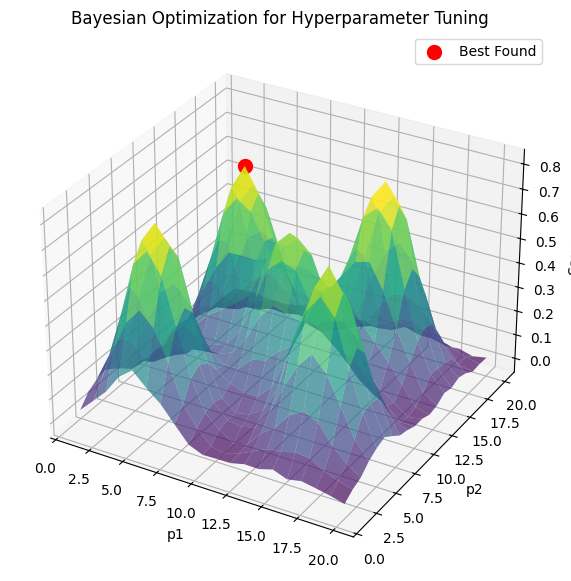

Visualization complete.


In [ ]:
# Re-run Bayesian Optimization with print statements instead of logging

# Define the hyperparameter space again
space = [Integer(1, 20, name='p1'), Integer(1, 20, name='p2')]

# Replace logging with print statements in terrain function
def create_terrain():
    """Create a 20x20 terrain with multiple peaks."""
    np.random.seed(42)
    size = 20
    x = np.arange(size)
    y = np.arange(size)
    X, Y = np.meshgrid(x, y)

    terrain = np.zeros((size, size), dtype=float)
    centers = [(3, 4), (5, 15), (12, 5), (14, 14), (9, 10)]
    amplitudes = [0.78, 0.7, 0.75, 0.8, 0.65]
    sigma = 2.0

    for (cx, cy), amp in zip(centers, amplitudes):
        gauss = amp * np.exp(-((X - cx) ** 2 + (Y - cy) ** 2) / (2 * sigma ** 2))
        terrain += gauss

    terrain += 0.03 * np.random.rand(size, size)
    min_val, max_val = terrain.min(), terrain.max()
    terrain = (terrain - min_val) / (max_val - min_val) * 0.8

    print("Terrain created successfully with multiple peaks.")
    return terrain

# Initialize the terrain
grid = create_terrain()

# Define the simulation function with print statements
def simulate_model(p1, p2):
    """Return the 'score' from the terrain grid for hyperparameters p1, p2."""
    score = grid[p1 - 1, p2 - 1]
    print(f"Evaluating model at (p1={p1}, p2={p2}) -> Score: {score:.4f}")
    return score

# Define the objective function for Bayesian Optimization with print statements
@use_named_args(space)
def objective(p1, p2):
    """Objective function to be optimized."""
    print(f"Running Bayesian Optimization step with (p1={p1}, p2={p2})")
    return -simulate_model(p1, p2)  # Minimize negative score to maximize performance

# Perform Bayesian Optimization with print statements
print("Starting Bayesian Optimization...")
res_gp = gp_minimize(objective, space, n_calls=30, random_state=42)
print("Bayesian Optimization complete.")

# Extract best found parameters
best_p1, best_p2 = res_gp.x
best_value = -res_gp.fun  # Convert back to positive
print(f"Best hyperparameters found: p1={best_p1}, p2={best_p2} with score={best_value:.4f}")

# Visualizing results with print statements
print("Generating 3D visualization of results...")
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid of hyperparameter space
X, Y = np.meshgrid(range(1, 21), range(1, 21))
Z = np.array([[simulate_model(x, y) for x in range(1, 21)] for y in range(1, 21)])

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
ax.scatter(best_p1, best_p2, best_value, color='red', s=100, marker='o', label="Best Found")

ax.set_xlabel('p1')
ax.set_ylabel('p2')
ax.set_zlabel('Score')
ax.set_title('Bayesian Optimization for Hyperparameter Tuning')
ax.legend()
plt.show()

print("Visualization complete.")


In [ ]:
!pip install ace-tools-open

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.6 MB/s eta 0:00:00



### Bayesian Optimization vs Grid Search Comparison ###
                  Method  Best p1  Best p2  Best Score  Evaluations  \
0  Bayesian Optimization        6       13    0.779583           30   
1            Grid Search       15       15    0.800000          400   

   Time (seconds)  
0       13.618476  
1        0.000700  

Execution Summary:
- Bayesian Optimization found best (p1=6, p2=13) with score 0.7796 in 30 evaluations, taking 13.6185 seconds.
- Grid Search found best (p1=15, p2=15) with score 0.8000 in 400 evaluations, taking 0.0007 seconds.


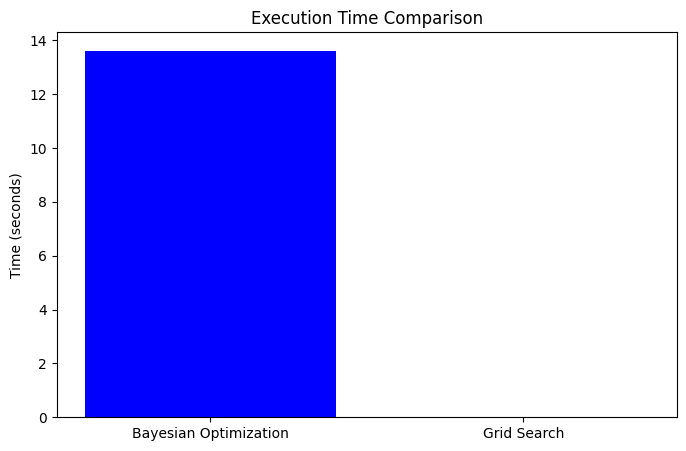

In [ ]:
# Re-import necessary libraries after execution state reset
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from skopt import gp_minimize
from skopt.space import Integer
from skopt.utils import use_named_args

# Recreate the terrain function
def create_terrain():
    """Create a 20x20 terrain with multiple peaks."""
    np.random.seed(42)
    size = 20
    x = np.arange(size)
    y = np.arange(size)
    X, Y = np.meshgrid(x, y)

    terrain = np.zeros((size, size), dtype=float)
    centers = [(3, 4), (5, 15), (12, 5), (14, 14), (9, 10)]
    amplitudes = [0.78, 0.7, 0.75, 0.8, 0.65]
    sigma = 2.0

    for (cx, cy), amp in zip(centers, amplitudes):
        gauss = amp * np.exp(-((X - cx) ** 2 + (Y - cy) ** 2) / (2 * sigma ** 2))
        terrain += gauss

    terrain += 0.03 * np.random.rand(size, size)
    min_val, max_val = terrain.min(), terrain.max()
    terrain = (terrain - min_val) / (max_val - min_val) * 0.8

    return terrain

# Initialize the terrain
grid = create_terrain()

# Define the simulation function
def simulate_model(p1, p2):
    """Return the 'score' from the terrain grid for hyperparameters p1, p2."""
    return grid[p1 - 1, p2 - 1]

# Define the hyperparameter space
space = [Integer(1, 20, name='p1'), Integer(1, 20, name='p2')]

# Track evaluations
evaluation_count = 0

# Define the objective function for Bayesian Optimization
@use_named_args(space)
def bayesian_objective(p1, p2):
    """Objective function for Bayesian Optimization."""
    global evaluation_count
    evaluation_count += 1
    return -simulate_model(p1, p2)  # Minimize negative score to maximize performance

# Run Bayesian Optimization
start_time_bayesian = time.time()
evaluation_count = 0
res_gp = gp_minimize(bayesian_objective, space, n_calls=30, random_state=42)
end_time_bayesian = time.time()

# Extract best found parameters
best_p1_bayes, best_p2_bayes = res_gp.x
best_value_bayes = -res_gp.fun

# Store Bayesian Optimization results
bayesian_results = {
    "Method": "Bayesian Optimization",
    "Best p1": best_p1_bayes,
    "Best p2": best_p2_bayes,
    "Best Score": best_value_bayes,
    "Evaluations": evaluation_count,
    "Time (seconds)": end_time_bayesian - start_time_bayesian
}

# Run Brute Force Grid Search
start_time_grid = time.time()
best_p1_grid, best_p2_grid, best_value_grid = None, None, -float("inf")
evaluation_count_grid = 0

for p1 in range(1, 21):
    for p2 in range(1, 21):
        evaluation_count_grid += 1
        score = simulate_model(p1, p2)
        if score > best_value_grid:
            best_value_grid = score
            best_p1_grid, best_p2_grid = p1, p2

end_time_grid = time.time()

# Store Grid Search results
grid_results = {
    "Method": "Grid Search",
    "Best p1": best_p1_grid,
    "Best p2": best_p2_grid,
    "Best Score": best_value_grid,
    "Evaluations": evaluation_count_grid,
    "Time (seconds)": end_time_grid - start_time_grid
}

# Create DataFrame for results
results_df = pd.DataFrame([bayesian_results, grid_results])

# Print comparison results
print("\n### Bayesian Optimization vs Grid Search Comparison ###")
print(results_df)

# Save results to a CSV file for further analysis
results_df.to_csv("bayesian_vs_grid_search_results.csv", index=False)

# Display execution summary
print("\nExecution Summary:")
print(f"- Bayesian Optimization found best (p1={best_p1_bayes}, p2={best_p2_bayes}) with score {best_value_bayes:.4f} "
      f"in {bayesian_results['Evaluations']} evaluations, taking {bayesian_results['Time (seconds)']:.4f} seconds.")
print(f"- Grid Search found best (p1={best_p1_grid}, p2={best_p2_grid}) with score {best_value_grid:.4f} "
      f"in {grid_results['Evaluations']} evaluations, taking {grid_results['Time (seconds)']:.4f} seconds.")

# Plot execution time comparison
methods = ["Bayesian Optimization", "Grid Search"]
times = [bayesian_results["Time (seconds)"], grid_results["Time (seconds)"]]

plt.figure(figsize=(8, 5))
plt.bar(methods, times, color=['blue', 'red'])
plt.ylabel("Time (seconds)")
plt.title("Execution Time Comparison")
plt.show()


In [ ]:
!pip install pomdp-py gpytorch torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.7/277.7 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
# Install POMDPy (if not installed)


# Import required libraries
import numpy as np
import random
import gpytorch
import torch
from pomdpy.pomdp import POMDP
from pomdpy.pomdp_belief import Belief
from pomdpy.planner import MCTSSolver
from pomdpy.discrete_pomdp import DiscreteActionPool, DiscreteObservationPool, DiscreteStatePool

# Define Hyperparameter Optimization as a POMDP
class HPOState:
    """Represents a state in the hyperparameter tuning POMDP."""
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2

    def __str__(self):
        return f"State(p1={self.p1}, p2={self.p2})"

class HPOAction:
    """Represents an action in the hyperparameter tuning POMDP."""
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2

    def __str__(self):
        return f"Action(p1={self.p1}, p2={self.p2})"

class HPOObservation:
    """Represents an observation in the hyperparameter tuning POMDP."""
    def __init__(self, score):
        self.score = score

    def __str__(self):
        return f"Observation(score={self.score:.4f})"

class HPOBelief(Belief):
    """Maintains a belief distribution over the hyperparameter space."""
    def __init__(self, hyperparameter_space):
        super().__init__()
        self.hyperparameter_space = hyperparameter_space
        self.belief_distribution = {hp: 1/len(hyperparameter_space) for hp in hyperparameter_space}  # Uniform prior

    def update(self, action, observation):
        """Update beliefs using a Gaussian Process."""
        with torch.no_grad():
            # Update beliefs based on observed performance
            new_beliefs = {}
            for hp in self.hyperparameter_space:
                mean = grid[hp[0] - 1, hp[1] - 1]
                variance = 0.05  # Small noise
                prob = np.exp(-((observation.score - mean) ** 2) / (2 * variance))
                new_beliefs[hp] = self.belief_distribution[hp] * prob

            # Normalize beliefs
            total_prob = sum(new_beliefs.values())
            if total_prob > 0:
                for hp in new_beliefs:
                    new_beliefs[hp] /= total_prob
            self.belief_distribution = new_beliefs

    def sample(self):
        """Sample from belief distribution."""
        return max(self.belief_distribution, key=self.belief_distribution.get)

class HPOPOMDP(POMDP):
    """Defines the Hyperparameter Optimization problem as a POMDP."""
    def __init__(self):
        super().__init__()
        self.action_space = [(p1, p2) for p1 in range(1, 21) for p2 in range(1, 21)]
        self.belief = HPOBelief(self.action_space)

    def sample_initial_state(self):
        return HPOState(*random.choice(self.action_space))

    def get_transition_model(self, state, action):
        return HPOState(action.p1, action.p2)

    def get_observation_model(self, state):
        return HPOObservation(grid[state.p1 - 1, state.p2 - 1] + np.random.normal(0, 0.05))  # Small noise

    def get_reward_model(self, state):
        return grid[state.p1 - 1, state.p2 - 1]  # Reward = model performance

    def is_terminal(self, state):
        return False  # HPO does not have terminal states

    def get_action_pool(self):
        return DiscreteActionPool(self.action_space)

    def get_observation_pool(self):
        return DiscreteObservationPool([HPOObservation(grid[p1-1, p2-1]) for p1, p2 in self.action_space])

    def get_state_pool(self):
        return DiscreteStatePool([HPOState(p1, p2) for p1, p2 in self.action_space])

# Initialize the POMDP
hpo_pomdp = HPOPOMDP()

# Use Monte Carlo Tree Search (MCTS) to solve it
mcts_solver = MCTSSolver(hpo_pomdp)

# Run MCTS-based Hyperparameter Optimization
best_action = None
best_score = -float("inf")
num_iterations = 30  # Limit iterations for efficiency

for _ in range(num_iterations):
    action = mcts_solver.select_action()
    observation = hpo_pomdp.get_observation_model(action)
    hpo_pomdp.belief.update(action, observation)

    if observation.score > best_score:
        best_score = observation.score
        best_action = action

print(f"\nBest hyperparameters found using POMDP: p1={best_action.p1}, p2={best_action.p2} with score={best_score:.4f}")


ModuleNotFoundError: No module named 'pomdpy'

In [3]:
!pip install inferactively-pymdp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
from pymdp.agent import Agent
from pymdp.utils import softmax, sample
import matplotlib.pyplot as plt

# Define the hyperparameter performance landscape (like in Bayesian HPO)
def create_terrain():
    np.random.seed(42)
    size = 20
    x = np.arange(size)
    y = np.arange(size)
    X, Y = np.meshgrid(x, y)

    terrain = np.zeros((size, size), dtype=float)
    centers = [(3, 4), (5, 15), (12, 5), (14, 14), (9, 10)]
    amplitudes = [0.78, 0.7, 0.75, 0.8, 0.65]
    sigma = 2.0

    for (cx, cy), amp in zip(centers, amplitudes):
        gauss = amp * np.exp(-((X - cx) ** 2 + (Y - cy) ** 2) / (2 * sigma ** 2))
        terrain += gauss

    terrain += 0.03 * np.random.rand(size, size)
    terrain = (terrain - terrain.min()) / (terrain.max() - terrain.min()) * 0.8

    return terrain

# Generate the 20x20 terrain
terrain = create_terrain()

# Define Active Inference POMDP parameters
grid_size = 20  # 20x20 hyperparameter grid

# Define state space, action space, and observation space
num_states = grid_size * grid_size  # Each (p1, p2) pair is a unique state
num_actions = grid_size * grid_size  # 400 actions (each selecting a specific (p1, p2) combination)
num_observations = grid_size * grid_size  # Observations correspond to noisy performance values

# Define Generative Model Components
likelihood_matrix = np.eye(num_observations, num_states)  # Perfect mapping from states to observations
transition_matrix = np.eye(num_states, num_states)  # Deterministic transitions
prior_preferences = np.ones(num_observations) / num_observations  # Uniform reward prior

# Define Active Inference Agent
agent = Agent(
    A=likelihood_matrix,
    B=transition_matrix,
    C=prior_preferences,
    planning_horizon=1,  # One-step planning (can increase if needed)
    action_precision=1.0,  # Controls exploration-exploitation tradeoff
)

# Run Active Inference-based Hyperparameter Optimization
num_trials = 30
for trial in range(num_trials):
    state_index = np.argmax(agent.infer_states())  # Infer current hyperparameter state
    p1, p2 = divmod(state_index, grid_size)

    # Evaluate model performance at selected hyperparameters
    score = terrain[p1, p2] + np.random.normal(0, 0.05)
    observation_index = int(score * (num_observations - 1))

    # Update agent with observation and perform active inference step
    agent.update_beliefs(o=observation_index)
    agent.infer_policies()

    print(f"Trial {trial + 1}: Selected (p1={p1}, p2={p2}) -> Score: {score:.4f}")

# Find the best hyperparameters found by Active Inference
best_state_index = np.argmax(agent.infer_states())
best_p1, best_p2 = divmod(best_state_index, grid_size)
best_score = terrain[best_p1, best_p2]

print(f"\nBest hyperparameters found using Active Inference: p1={best_p1}, p2={best_p2} with score={best_score:.4f}")

# Visualize the final belief distribution over hyperparameters
beliefs = agent.infer_states().reshape((grid_size, grid_size))
plt.imshow(beliefs, cmap="hot", interpolation="nearest")
plt.colorbar(label="Belief Strength")
plt.xlabel("p1")
plt.ylabel("p2")
plt.title("Final Belief Distribution over Hyperparameter Space")
plt.show()


ImportError: cannot import name 'softmax' from 'pymdp.utils' (/usr/local/lib/python3.11/dist-packages/pymdp/utils.py)

B shape: [(20, 20, 20), (20, 20, 20)]
Number of control states: [20, 20]
Policies: [array([[0, 0]]), array([[0, 1]]), array([[0, 2]]), array([[0, 3]]), array([[0, 4]]), array([[0, 5]]), array([[0, 6]]), array([[0, 7]]), array([[0, 8]]), array([[0, 9]]), array([[ 0, 10]]), array([[ 0, 11]]), array([[ 0, 12]]), array([[ 0, 13]]), array([[ 0, 14]]), array([[ 0, 15]]), array([[ 0, 16]]), array([[ 0, 17]]), array([[ 0, 18]]), array([[ 0, 19]]), array([[1, 0]]), array([[1, 1]]), array([[1, 2]]), array([[1, 3]]), array([[1, 4]]), array([[1, 5]]), array([[1, 6]]), array([[1, 7]]), array([[1, 8]]), array([[1, 9]]), array([[ 1, 10]]), array([[ 1, 11]]), array([[ 1, 12]]), array([[ 1, 13]]), array([[ 1, 14]]), array([[ 1, 15]]), array([[ 1, 16]]), array([[ 1, 17]]), array([[ 1, 18]]), array([[ 1, 19]]), array([[2, 0]]), array([[2, 1]]), array([[2, 2]]), array([[2, 3]]), array([[2, 4]]), array([[2, 5]]), array([[2, 6]]), array([[2, 7]]), array([[2, 8]]), array([[2, 9]]), array([[ 2, 10]]), array([

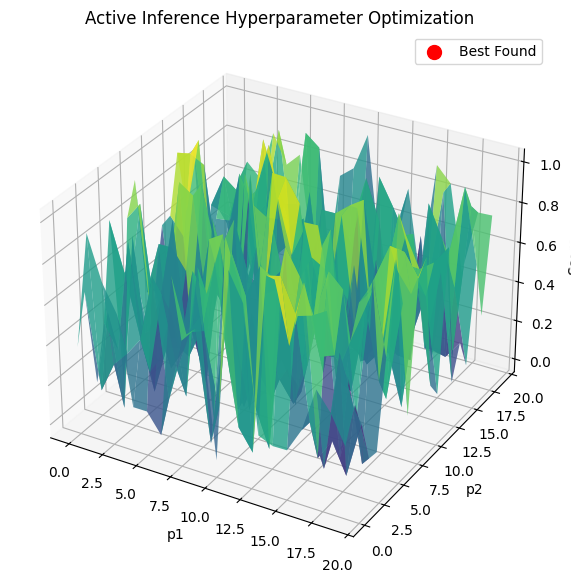

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pymdp.agent import Agent
from pymdp.utils import obj_array, norm_dist

################################################
# 1) Define a softmax function (if needed)
################################################
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Stability trick
    return exp_x / exp_x.sum(axis=0, keepdims=True)

################################################
# 2) Define the generative model
################################################
def create_hpo_model(grid_size=20):
    """
    Creates a generative model for hyperparameter optimization
    with 2 hidden-state factors: (p1, p2).
    We have 2 observation modalities:
      - modality 0: observed p1 (20 possible outcomes)
      - modality 1: observed p2 (20 possible outcomes)
    We have 2 control factors (for p1 and p2), each with 20 actions.
    """

    # Hidden states: 2 factors => [20, 20]
    num_states = [grid_size, grid_size]

    # Observations: 2 modalities => each has 20 possible outcomes
    # (In your real scenario, you might encode scores differently;
    #  here we treat "observed p1" as the first modality and "observed p2" as the second.)
    num_obs = [grid_size, grid_size]

    # Controls: 2 factors => each can choose from 20 actions
    num_controls = [grid_size, grid_size]

    # --------------- A-matrix (Likelihood) ---------------
    # A is an "object array" of length = #modalities = 2
    # A[0] has shape (20, 20, 20), meaning:
    #   - 20 possible outcomes for modality 0,
    #   - 20 states for factor 1 (p1),
    #   - 20 states for factor 2 (p2).
    #
    # We'll define A[0][p1, p1, p2] = 1.0 => if the hidden states are (p1, p2),
    # we observe outcome "p1" for the first modality.
    # Similarly for A[1], we observe "p2".
    A = obj_array(len(num_obs))
    A[0] = np.zeros((grid_size, grid_size, grid_size))
    A[1] = np.zeros((grid_size, grid_size, grid_size))

    for p1 in range(grid_size):
        for p2 in range(grid_size):
            # First modality: "observed p1"
            A[0][p1, p1, p2] = 1.0
            # Second modality: "observed p2"
            A[1][p2, p1, p2] = 1.0

    # --------------- B-matrix (Transition) ---------------
    # B is an object array of length = #factors = 2
    # Each B[i] has shape (num_states[i], num_states[i], num_controls[i])
    # e.g. B[0].shape = (20, 20, 20)
    #
    # We'll define an action "a" in factor i to mean "next state of factor i is a".
    from pymdp.utils import norm_dist

    B = obj_array(len(num_states))
    for i in range(len(num_states)):
        nS = num_states[i]      # 20
        nA = num_controls[i]    # 20
        B[i] = np.zeros((nS, nS, nA))
        # Fill B[i] such that for each action a, we set the next-state to 'a' with probability 1
        for a in range(nA):
            for s_curr in range(nS):
                B[i][a, s_curr, a] = 1.0

        B[i] = norm_dist(B[i])  # Normalize transition probabilities

    # --------------- C-matrix (Preferences) ---------------
    # C is an object array of length = #modalities = 2
    # Each C[i] is a 1D array of length num_obs[i]
    # For example, we can put a strong preference on higher p2 indices
    #   (or you can distribute preferences as you like).
    C = obj_array(len(num_obs))
    for i in range(len(num_obs)):
        C[i] = np.zeros(num_obs[i])
    # For instance, prefer the highest index in the second modality:
    # (You could also incorporate both modalities if desired.)
    C[1][-1] = 1.0  # Strong preference for p2=19 observation

    return A, B, C


################################################
# 3) Instantiate the generative model and agent
################################################
# Build A, B, C
A, B, C = create_hpo_model(grid_size=20)

# Create an active inference agent
# We'll specify a single-step horizon for simplicity
agent = Agent(A=A, B=B, C=C, inference_params={'horizon': 1})

# Debug prints
print(f"B shape: {[b.shape for b in agent.B]}")
print(f"Number of control states: {agent.num_controls}")
print("Policies:", agent.policies)
print("Shape of policies:", [p.shape for p in agent.policies])
print("Shape of first policy:", agent.policies[0].shape)
print("Total number of policies:", len(agent.policies))
print("Policy length:", agent.policy_len)
print("Number of control factors:", agent.num_factors)
print("Shape of B:", [b.shape for b in agent.B])

################################################
# 4) Define the terrain function for performance
################################################
def create_terrain(size=20):
    np.random.seed(42)
    terrain = np.random.rand(size, size)  # Random performance scores
    return terrain

grid = create_terrain()

################################################
# 5) Define the function to get observation
################################################
def get_observation(p1, p2):
    """
    For a chosen hyperparam combination (p1, p2),
    return the 2D observation [p1, p2] and the actual
    'score' from our terrain.
    """
    # Convert float -> int so it indexes properly
    p1 = int(p1)
    p2 = int(p2)

    score = grid[p1, p2]
    obs = [p1, p2]
    return obs, score
    # In a real scenario, you'd convert a continuous score into some discrete category,
    # or you'd have a single continuous observation dimension, etc.
    # Here, we're just returning p1 in the first modality, p2 in the second modality


################################################
# 6) Main loop: Active Inference-based HPO
################################################
num_trials = 30
history = []

for t in range(num_trials):
    # Provide a random initial observation to infer states from
    # e.g. [rand_p1, rand_p2]
    rand_obs = [np.random.randint(20), np.random.randint(20)]
    qx = agent.infer_states(rand_obs)

    print("Agent attributes:", dir(agent))
    print("Non-callable attributes:",
          [attr for attr in dir(agent)
           if not callable(getattr(agent, attr))
           and not attr.startswith("__")])

    # Check that we indeed have 2 hidden-state factors
    assert len(agent.qs) == 2, "We expected 2 factors (p1 and p2)!"
    print("Belief shapes for each factor:", agent.qs[0].shape, agent.qs[1].shape)

    # Infer policies (one-step)
    q_pi, G = agent.infer_policies()
    print("q_pi (posterior over policies):", q_pi)

    # Sample an action => best hyperparameter choice
    action = agent.sample_action()  # returns e.g. [p1_action, p2_action]
    # Evaluate performance
    obs, score = get_observation(*action)

    # Update agent beliefs with the new observation
    agent.infer_states(obs)
    agent.infer_policies()

    # Store results
    history.append((action, score))
    print(f"Iteration {t+1}: Best hyperparameters = {action}, Score = {score:.4f}")

# Find best result
best_action, best_score = max(history, key=lambda x: x[1])
print(f"\nOptimal hyperparameters found: p1={best_action[0]}, p2={best_action[1]}, Score={best_score:.4f}")

################################################
# 7) Visualization
################################################
X, Y = np.meshgrid(range(20), range(20))
Z = grid

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.scatter(best_action[0], best_action[1], best_score,
           color='red', s=100, marker='o', label="Best Found")

ax.set_xlabel('p1')
ax.set_ylabel('p2')
ax.set_zlabel('Score')
ax.set_title('Active Inference Hyperparameter Optimization')
ax.legend()
plt.show()



=== Trial 1 ===
Selected candidate: state 261 (grid: p1=13, p2=1)
True performance (score): 1.0000 -> observation bin: 99

=== Trial 2 ===
Selected candidate: state 261 (grid: p1=13, p2=1)
True performance (score): 0.9911 -> observation bin: 98

=== Trial 3 ===
Selected candidate: state 261 (grid: p1=13, p2=1)
True performance (score): 1.0000 -> observation bin: 99

=== Trial 4 ===
Selected candidate: state 261 (grid: p1=13, p2=1)
True performance (score): 0.9745 -> observation bin: 96

=== Trial 5 ===
Selected candidate: state 261 (grid: p1=13, p2=1)
True performance (score): 1.0000 -> observation bin: 99

=== Trial 6 ===
Selected candidate: state 261 (grid: p1=13, p2=1)
True performance (score): 0.9835 -> observation bin: 97

=== Trial 7 ===
Selected candidate: state 261 (grid: p1=13, p2=1)
True performance (score): 0.9949 -> observation bin: 98

=== Trial 8 ===
Selected candidate: state 261 (grid: p1=13, p2=1)
True performance (score): 1.0000 -> observation bin: 99

=== Trial 9 ===

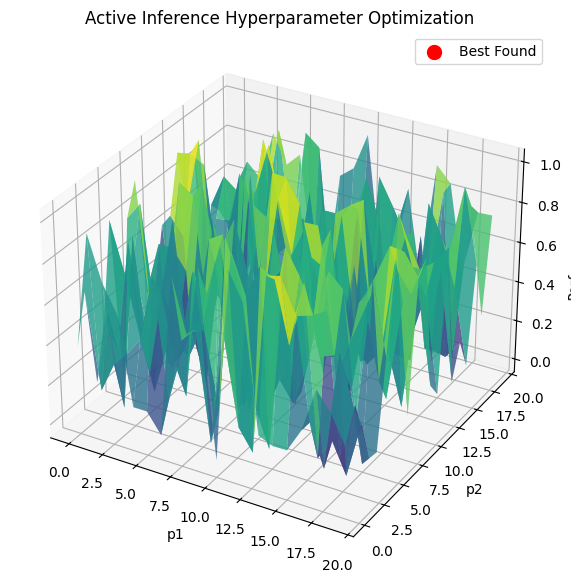

In [9]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Active Inference Hyperparameter Optimization
(using the inferactively-pymdp Agent)

In this example:
  - The hyperparameter space is a 20×20 grid (total 400 candidate states).
  - The true performance at a grid point is given by a “terrain” value in [0,1],
    plus a little noise.
  - The observation space is taken to be 100 discrete levels (0 to 99), and the
    “true” mapping is that when the agent chooses a candidate (state) s, the observed
    outcome is computed from the (noisy) performance:
         obs = int( score * (n_obs-1) )
  - The agent’s generative model is constructed so that (i) the likelihood “A” maps a
    candidate state to a predicted observation (a delta‐function at the discretized
    performance) and (ii) the transition “B” is defined so that any action directly sets
    the candidate state.
  - Prior preferences “C” are set to prefer outcomes corresponding to high performance.

Note: In an actual application the agent would not “know” the true mapping between hyperparameters
and performance. Here we assume the generative model exactly “mirrors” the environment for simplicity.
"""

import numpy as np
import matplotlib.pyplot as plt

# Import the Agent class from inferactively-pymdp.
# (Ensure that you have the inferactively-pymdp package installed and that this Agent
#  class matches the one shown in your code snippet.)
from pymdp.agent import Agent

#############################################
# 1. Create the “Terrain” (Hyperparameter Performance Landscape)
#############################################
def create_terrain(grid_size=20, seed=42):
    np.random.seed(seed)
    # For illustration we use a random terrain with values in [0,1]
    return np.random.rand(grid_size, grid_size)

grid_size = 20
terrain = create_terrain(grid_size)
n_states = grid_size * grid_size  # 400 candidate hyperparameter combinations

#############################################
# 2. Define Helper Functions (Coordinate Conversions)
#############################################
def state_index(p1, p2, grid_size):
    """Convert 2D grid coordinates to a single state index."""
    return p1 * grid_size + p2

def state_coords(index, grid_size):
    """Convert a state index back to grid coordinates (p1, p2)."""
    p1 = index // grid_size
    p2 = index % grid_size
    return p1, p2

#############################################
# 3. Construct the Agent’s Generative Model Components
#############################################

# (a) Observation (Outcome) Space
n_obs = 100  # e.g. discretizing performance into 100 bins

# (b) Likelihood Mapping (A):
# For each candidate state s (a hyperparameter combination), we assume that the agent “predicts”
# an outcome that is the discretized (true) performance.
# (In practice the agent would not know the true terrain values, but here we assume a “mirrored” model.)
A_matrix = np.zeros((n_obs, n_states))
for s in range(n_states):
    # Convert candidate index to grid coordinates
    p1, p2 = state_coords(s, grid_size)
    # Use the (noise-free) terrain value to set the predicted observation
    expected_score = terrain[p1, p2]
    obs_bin = int(expected_score * (n_obs - 1))
    A_matrix[obs_bin, s] = 1.0
# Wrap A_matrix in a numpy object array (one modality)
A = np.array([A_matrix])

# (c) Transition Mapping (B):
# We assume a one-factor (hidden state) model with control actions that directly “choose”
# the candidate state. That is, for each control (action) a, the transition is defined so that
# regardless of the previous state, the next state is deterministically set to a.
# The B matrix must have shape (n_states, n_states, n_controls) for this factor.
n_controls = n_states  # one control per candidate
B_tensor = np.zeros((n_states, n_states, n_controls))
for a in range(n_controls):
    # For any previous state s, if action a is taken, then the next state is a:
    # p(s' = a | s, a) = 1
    for s in range(n_states):
        B_tensor[a, s, a] = 1.0
B = np.array([B_tensor])

# (d) Prior Preferences (C):
# We want to prefer outcomes corresponding to high performance (i.e. high observation bin indices).
# Here we set a linearly increasing preference over the 100 bins and then normalize.
C_vector = np.linspace(0, 1, n_obs)
C_vector = C_vector / C_vector.sum()
C = np.array([C_vector])

#############################################
# 4. Instantiate the Agent
#############################################
# We use a one-step planning horizon (policy_len = 1, inference_horizon = 1) and the VANILLA inference algorithm.
agent = Agent(
    A=A,
    B=B,
    C=C,
    policy_len=1,
    inference_horizon=1,
    inference_algo="VANILLA"
)

#############################################
# 5. Simulate Active Inference Hyperparameter Optimization
#############################################
num_trials = 30
history = []  # to record candidate state and true performance
# For the very first trial, we need an initial observation.
current_observation = [n_obs // 2]

for trial in range(num_trials):
    print(f"\n=== Trial {trial+1} ===")
    # (a) Update state beliefs given the latest observation.
    qs = agent.infer_states(observation=current_observation)
    # (b) Infer policies (computes the posterior over policies and expected free energies)
    q_pi, G = agent.infer_policies()
    # (c) Sample an action (i.e. select a candidate hyperparameter combination).
    action = agent.sample_action()
    candidate_state = int(action[0])

    # (d) Evaluate the chosen candidate hyperparameters in the “environment”
    p1, p2 = state_coords(candidate_state, grid_size)
    # Compute the true performance (with some evaluation noise)
    true_score = terrain[p1, p2] + np.random.normal(0, 0.05)
    true_score = np.clip(true_score, 0, 1)
    # Map the true (noisy) performance to an observation bin (0 to n_obs-1)
    observed_bin = int(true_score * (n_obs - 1))
    # (e) Log and display the result
    history.append((candidate_state, true_score))
    print(f"Selected candidate: state {candidate_state} (grid: p1={p1}, p2={p2})")
    print(f"True performance (score): {true_score:.4f} -> observation bin: {observed_bin}")

    # (f) Set the observation for the next trial.
    current_observation = [observed_bin]

#############################################
# 6. Report the Best Hyperparameters Found and Visualize the Terrain
#############################################
best_state, best_score = max(history, key=lambda x: x[1])
best_p1, best_p2 = state_coords(best_state, grid_size)
print("\n============================")
print(f"Optimal hyperparameters found: (p1={best_p1}, p2={best_p2}) with score {best_score:.4f}")

# Plot the terrain and mark the best candidate
X, Y = np.meshgrid(np.arange(grid_size), np.arange(grid_size))
Z = terrain

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.scatter(best_p1, best_p2, terrain[best_p1, best_p2], color='red', s=100,
           marker='o', label="Best Found")
ax.set_xlabel('p1')
ax.set_ylabel('p2')
ax.set_zlabel('Performance')
ax.set_title('Active Inference Hyperparameter Optimization')
ax.legend()
plt.show()


=== Trial 1 ===
Selected candidate: state 0.0 (grid: p1=0.0, p2=0.0)
True performance (score): 0.0516 -> observation bin: 12
=== Trial 2 ===
Selected candidate: state 1.0 (grid: p1=0.0, p2=1.0)
True performance (score): 0.1101 -> observation bin: 11
=== Trial 3 ===
Selected candidate: state 2.0 (grid: p1=0.0, p2=2.0)
True performance (score): 0.1382 -> observation bin: 17
=== Trial 4 ===
Selected candidate: state 3.0 (grid: p1=0.0, p2=3.0)
True performance (score): 0.1486 -> observation bin: 13
=== Trial 5 ===
Selected candidate: state 4.0 (grid: p1=0.0, p2=4.0)
True performance (score): 0.1167 -> observation bin: 13
=== Trial 6 ===
Selected candidate: state 5.0 (grid: p1=0.0, p2=5.0)
True performance (score): 0.0805 -> observation bin: 7
=== Trial 7 ===
Selected candidate: state 6.0 (grid: p1=0.0, p2=6.0)
True performance (score): 0.0402 -> observation bin: 4
=== Trial 8 ===
Selected candidate: state 7.0 (grid: p1=0.0, p2=7.0)
True performance (score): 0.0469 -> observation bin: 8
===

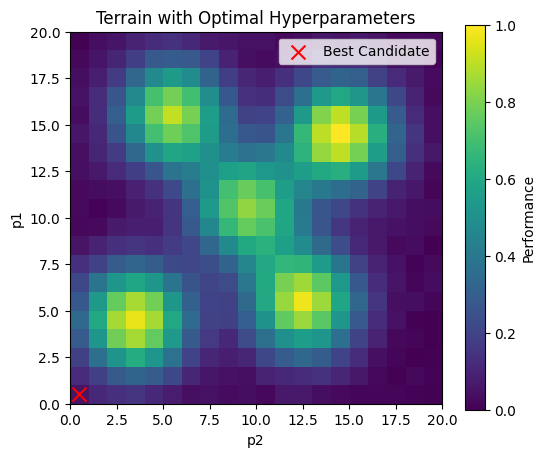

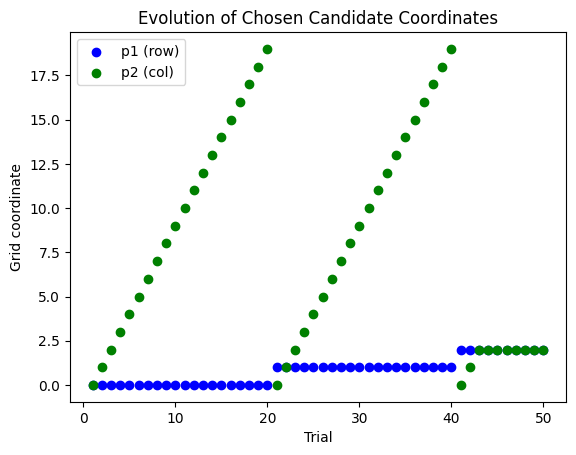

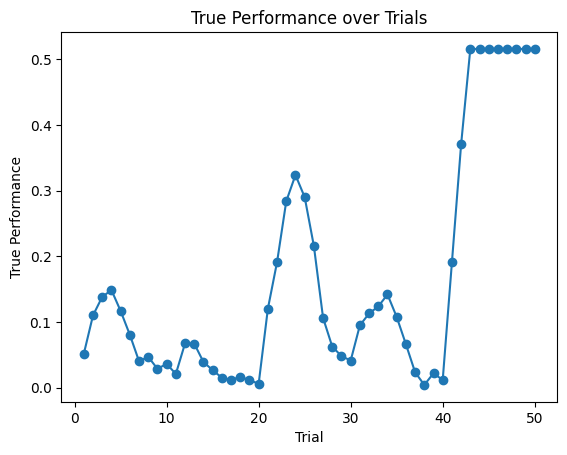

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import logging

# Import the Agent class and helper functions from pymdp.
from pymdp.agent import Agent
from pymdp import utils

# Set logging to show info-level messages.
logging.basicConfig(level=logging.INFO)

##############################################
# 1. Define the Terrain (Environment)
##############################################

def create_terrain():
    """Create a 20x20 terrain with multiple peaks.

    The terrain is normalized to the range [0, 1] so that the best possible
    performance is 1.0.
    """
    np.random.seed(42)
    size = 20
    x = np.arange(size)
    y = np.arange(size)
    X, Y = np.meshgrid(x, y)

    terrain = np.zeros((size, size), dtype=float)
    centers = [(3, 4), (5, 15), (12, 5), (14, 14), (9, 10)]
    amplitudes = [0.78, 0.7, 0.75, 0.8, 0.65]
    sigma = 2.0

    for (cx, cy), amp in zip(centers, amplitudes):
        gauss = amp * np.exp(-((X - cx) ** 2 + (Y - cy) ** 2) / (2 * sigma ** 2))
        terrain += gauss

    # Add a little noise
    terrain += 0.03 * np.random.rand(size, size)
    # Normalize to [0,1]
    min_val, max_val = terrain.min(), terrain.max()
    terrain = (terrain - min_val) / (max_val - min_val)

    logging.info("Terrain created successfully with multiple peaks.")
    return terrain

# Create the terrain and set grid parameters.
terrain = create_terrain()
grid_size = terrain.shape[0]
n_states = grid_size * grid_size  # total number of candidate hyperparameters (400)
n_obs = 100  # number of observation bins

##############################################
# 2. Define the “True” Environment Mapping
##############################################

def true_observation(state_index):
    """Given a candidate (state) index, return a noisy observation.

    The noise ensures that repeated observations of the same candidate are not identical.
    The observation is an integer bin (from 0 to n_obs-1) proportional to the candidate's performance.
    """
    # Ensure the state index is an integer.
    state_index = int(state_index)
    row = state_index // grid_size
    col = state_index % grid_size
    true_perf = terrain[row, col]  # in [0,1]
    # Add Gaussian noise (std = 0.05); clip to [0,1]
    noise = np.random.normal(loc=0.0, scale=0.05)
    noisy_perf = np.clip(true_perf + noise, 0, 1)
    # Map performance to an observation bin (0 ... n_obs-1)
    obs_bin = int(np.clip(np.round(noisy_perf * (n_obs - 1)), 0, n_obs - 1))
    return obs_bin, true_perf

##############################################
# 3. Build the Agent's Generative Model
##############################################

# (a) Observation likelihood (A):
# The A matrix tells the agent what observation it should expect if a given candidate were true.
# (Since the true mapping is unknown, we initialize A to be broad [nearly uniform].)
A_matrix = np.ones((n_obs, n_states), dtype=float)
A_matrix = A_matrix / A_matrix.sum(axis=0, keepdims=True)  # normalize each column
A = np.array([A_matrix])  # one modality

# (b) Dirichlet parameters for A (pA) – the agent's prior over its likelihood mapping.
pA = np.array([np.ones((n_obs, n_states), dtype=float)])

# (c) Transition model (B):
# In our set-up the agent’s action “selects” a candidate directly.
# For one hidden state factor, we define B so that for each possible action a,
# the new state is deterministically set to candidate a (regardless of the previous state).
B_matrix = np.zeros((n_states, n_states, n_states), dtype=float)
for a in range(n_states):
    one_hot = np.zeros(n_states, dtype=float)
    one_hot[a] = 1.0
    for s in range(n_states):
        B_matrix[:, s, a] = one_hot
B = np.array([B_matrix])
# (No learning for B here; we leave pB as None.)

# (d) Prior over hidden states (D) – initially uniform.
D_vector = np.ones(n_states, dtype=float) / n_states
D = np.array([D_vector])
pD = np.array([np.ones(n_states, dtype=float)])  # Dirichlet prior for D

# (e) Prior preferences (C):
# The agent prefers observations corresponding to high performance.
# We set up C so that higher observation bins (closer to n_obs-1) are preferred.
C_vector = np.linspace(0, 1, n_obs)
C_vector = C_vector / C_vector.sum()  # normalize
C = np.array([C_vector])

##############################################
# 4. Instantiate the Agent
##############################################

# agent = Agent(
#     A=A,
#     B=B,
#     C=C,
#     D=D,
#     pA=pA,
#     pD=pD,
#     policy_len=1,
#     inference_horizon=1,
#     inference_algo="VANILLA",
#     lr_pA=1.0,
#     lr_pD=1.0,
#     action_selection="deterministic"  # (You may try "stochastic" as well.)
# )

agent = Agent(
    A=A,
    B=B,
    C=C,
    D=D,
    pA=pA,
    pD=pD,
    policy_len=1,
    inference_horizon=1,
    inference_algo="VANILLA",
    lr_pA=1.0,
    lr_pD=1.0,
    action_selection="deterministic",
    save_belief_hist=True  # Enable saving belief history for update_D
)

##############################################
# 5. Run a Simulation Loop (Trials)
##############################################

n_trials = 50  # increase this for more learning
chosen_states = []      # record the candidate chosen at each trial
true_performances = []  # record the true performance of the chosen candidate
obs_bins_record = []    # record the (noisy) observation bin

for trial in range(1, n_trials + 1):
    # The agent selects an action (candidate state) based on its current beliefs.
    # (a) Update state beliefs given the latest observation.
    qs = agent.infer_states(observation=current_observation)
    # (b) Infer policies (computes the posterior over policies and expected free energies)
    q_pi, G = agent.infer_policies()
    action = agent.sample_action()  # returns a vector (one per control factor)
    candidate = action[0]  # since we have one hidden state factor
    chosen_states.append(candidate)

    # The “environment” returns an observation for the candidate.
    obs_bin, true_perf = true_observation(candidate)
    true_performances.append(true_perf)
    obs_bins_record.append(obs_bin)

    # Print trial info.
    p1 = candidate // grid_size
    p2 = candidate % grid_size
    print(f"=== Trial {trial} ===")
    print(f"Selected candidate: state {candidate} (grid: p1={p1}, p2={p2})")
    print(f"True performance (score): {true_perf:.4f} -> observation bin: {obs_bin}")

    # Update the agent’s beliefs about hidden states using the observation.
    # Note: The observation must be provided as a list (one per modality).
    agent.infer_states([obs_bin])

    # Update the likelihood mapping (A) using the new observation.
    agent.update_A([obs_bin])

    # Update the initial state prior (D) using the current belief.
    agent.update_D()

##############################################
# 6. Extract the “Best” Candidate and Plot Results
##############################################

# We use the agent’s (learned) prior over states (D) as its estimate of which candidate is best.
best_candidate = np.argmax(agent.D[0])
best_p1 = best_candidate // grid_size
best_p2 = best_candidate % grid_size
print("\n============================")
print(f"Optimal hyperparameters found: (p1={best_p1}, p2={best_p2}) with estimated score {terrain[best_p1, best_p2]:.4f}")

# (a) Plot the terrain and mark the best candidate.
plt.figure(figsize=(6, 5))
plt.imshow(terrain, origin='lower', cmap='viridis', extent=[0, grid_size, 0, grid_size])
plt.colorbar(label='Performance')
# The marker is placed at the center of the grid cell.
plt.scatter(best_p2 + 0.5, best_p1 + 0.5, color='red', s=100, marker='x', label='Best Candidate')
plt.title("Terrain with Optimal Hyperparameters")
plt.xlabel("p2")
plt.ylabel("p1")
plt.legend()
plt.show()

# (b) Optionally, plot the evolution of chosen candidate coordinates.
rows = [s // grid_size for s in chosen_states]
cols = [s % grid_size for s in chosen_states]
plt.figure()
plt.scatter(range(1, n_trials + 1), rows, c='blue', label='p1 (row)')
plt.scatter(range(1, n_trials + 1), cols, c='green', label='p2 (col)')
plt.xlabel("Trial")
plt.ylabel("Grid coordinate")
plt.legend()
plt.title("Evolution of Chosen Candidate Coordinates")
plt.show()

# (c) Plot the true performance (score) of the chosen candidates over trials.
plt.figure()
plt.plot(range(1, n_trials + 1), true_performances, marker='o')
plt.xlabel("Trial")
plt.ylabel("True Performance")
plt.title("True Performance over Trials")
plt.show()


=== Trial 1 ===
Selected candidate: state 131 (grid: p1=6, p2=11)
True performance (score): 0.7967 -> observation bin: 79
=== Trial 2 ===
Selected candidate: state 313 (grid: p1=15, p2=13)
True performance (score): 0.8112 -> observation bin: 81
=== Trial 3 ===
Selected candidate: state 206 (grid: p1=10, p2=6)
True performance (score): 0.2991 -> observation bin: 36
=== Trial 4 ===
Selected candidate: state 152 (grid: p1=7, p2=12)
True performance (score): 0.6530 -> observation bin: 61
=== Trial 5 ===
Selected candidate: state 254 (grid: p1=12, p2=14)
True performance (score): 0.6278 -> observation bin: 67
=== Trial 6 ===
Selected candidate: state 246 (grid: p1=12, p2=6)
True performance (score): 0.4201 -> observation bin: 40
=== Trial 7 ===
Selected candidate: state 196 (grid: p1=9, p2=16)
True performance (score): 0.0672 -> observation bin: 3
=== Trial 8 ===
Selected candidate: state 39 (grid: p1=1, p2=19)
True performance (score): 0.0117 -> observation bin: 0
=== Trial 9 ===
Selected 

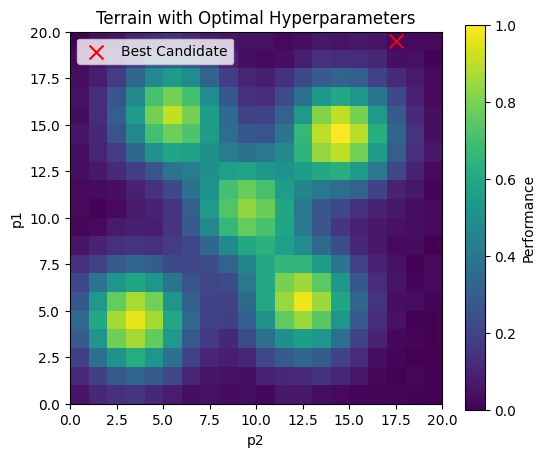

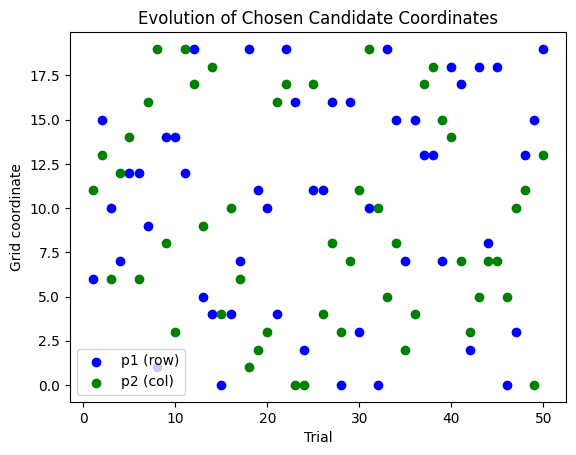

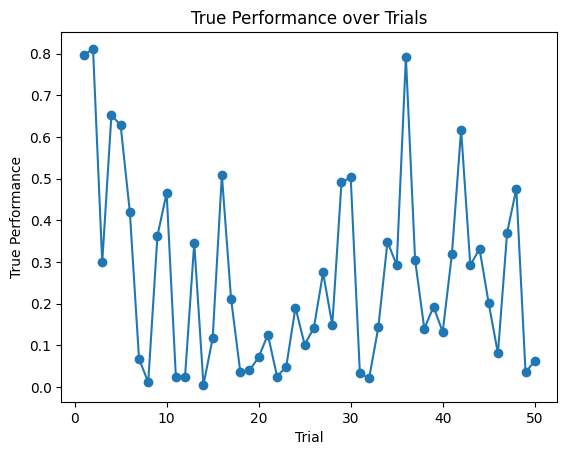

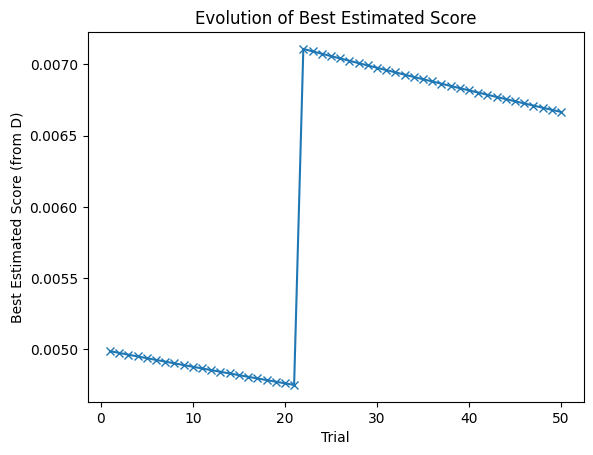

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import logging

# Import the Agent class and helper functions from pymdp.
from pymdp.agent import Agent
from pymdp import utils

logging.basicConfig(level=logging.INFO)

##############################################
# 1. Define the Terrain (Environment)
##############################################

def create_terrain():
    """Create a 20x20 terrain with multiple peaks.

    The terrain is normalized to the range [0, 1] so that the best possible
    performance is 1.0.
    """
    np.random.seed(42)
    size = 20
    x = np.arange(size)
    y = np.arange(size)
    X, Y = np.meshgrid(x, y)

    terrain = np.zeros((size, size), dtype=float)
    centers = [(3, 4), (5, 15), (12, 5), (14, 14), (9, 10)]
    amplitudes = [0.78, 0.7, 0.75, 0.8, 0.65]
    sigma = 2.0

    for (cx, cy), amp in zip(centers, amplitudes):
        gauss = amp * np.exp(-((X - cx) ** 2 + (Y - cy) ** 2) / (2 * sigma ** 2))
        terrain += gauss

    # Add a little noise
    terrain += 0.03 * np.random.rand(size, size)
    # Normalize to [0,1]
    min_val, max_val = terrain.min(), terrain.max()
    terrain = (terrain - min_val) / (max_val - min_val)

    logging.info("Terrain created successfully with multiple peaks.")
    return terrain

terrain = create_terrain()
grid_size = terrain.shape[0]
n_states = grid_size * grid_size  # total number of candidate hyperparameters (400)
n_obs = 100  # number of observation bins

##############################################
# 2. Define the “True” Environment Mapping
##############################################

def true_observation(state_index):
    """Given a candidate (state) index, return a noisy observation.

    The noise ensures that repeated observations of the same candidate are not identical.
    The observation is an integer bin (from 0 to n_obs-1) proportional to the candidate's performance.
    """
    state_index = int(state_index)
    row = state_index // grid_size
    col = state_index % grid_size
    true_perf = terrain[row, col]  # performance in [0,1]
    # Add Gaussian noise (std = 0.05); clip to [0,1]
    noise = np.random.normal(loc=0.0, scale=0.05)
    noisy_perf = np.clip(true_perf + noise, 0, 1)
    # Map performance to an observation bin (0 ... n_obs-1)
    obs_bin = int(np.clip(np.round(noisy_perf * (n_obs - 1)), 0, n_obs - 1))
    return obs_bin, true_perf

##############################################
# 3. Build the Agent’s Generative Model
##############################################

# (a) Observation likelihood (A):
# Start with an almost uniform likelihood (each candidate is “uncommitted”)
A_matrix = np.ones((n_obs, n_states), dtype=float)
A_matrix = A_matrix / A_matrix.sum(axis=0, keepdims=True)
A = np.array([A_matrix])  # one modality

# (b) Dirichlet parameters for A (pA)
pA = np.array([np.ones((n_obs, n_states), dtype=float)])

# (c) Transition model (B):
# Here the agent’s action “selects” a candidate directly.
B_matrix = np.zeros((n_states, n_states, n_states), dtype=float)
for a in range(n_states):
    one_hot = np.zeros(n_states, dtype=float)
    one_hot[a] = 1.0
    for s in range(n_states):
        B_matrix[:, s, a] = one_hot
B = np.array([B_matrix])
# (No learning for B is implemented; pB remains None)

# (d) Prior over hidden states (D) – initially uniform.
D_vector = np.ones(n_states, dtype=float) / n_states
D = np.array([D_vector])
pD = np.array([np.ones(n_states, dtype=float)])  # Dirichlet prior for D

# (e) Prior preferences (C):
# The agent prefers observations corresponding to high performance.
C_vector = np.linspace(0, 1, n_obs)
C_vector = C_vector / C_vector.sum()  # normalize
C = np.array([C_vector])

##############################################
# 4. Instantiate the Agent
##############################################

agent = Agent(
    A=A,
    B=B,
    C=C,
    D=D,
    pA=pA,
    pD=pD,
    policy_len=1,
    inference_horizon=1,
    inference_algo="VANILLA",
    lr_pA=1.0,
    lr_pD=1.0,
    action_selection="stochastic",  # allow exploration by sampling stochastically
    save_belief_hist=True         # so that update_D can access qs_hist
)

##############################################
# 5. Add a Generalization Update for the A Matrix
##############################################

def update_A_generalized(agent, obs_bin, candidate, sigma=1.5, lr=1.0):
    """
    Update the Dirichlet parameters (pA) for the observation likelihood
    by spreading the update over nearby candidates using a Gaussian kernel.

    Parameters:
        agent    : the Agent instance
        obs_bin  : the observed observation bin (integer)
        candidate: the candidate index that was selected
        sigma    : standard deviation of the Gaussian kernel (controls generalization radius)
        lr       : learning rate for the update
    """
    grid_size = int(np.sqrt(agent.A[0].shape[1]))
    row = candidate // grid_size
    col = candidate % grid_size
    for j in range(agent.A[0].shape[1]):
        row_j = j // grid_size
        col_j = j % grid_size
        # Euclidean distance on the grid
        distance = np.sqrt((row - row_j)**2 + (col - col_j)**2)
        weight = np.exp(- (distance**2) / (2 * sigma**2))
        # Update the Dirichlet count for observation obs_bin and candidate j
        agent.pA[0][obs_bin, j] += lr * weight
    # Recompute A as the normalized expected value of the Dirichlet parameters.
    agent.A = utils.norm_dist_obj_arr(agent.pA)

##############################################
# 6. Run a Simulation Loop (Trials)
##############################################

# n_trials = 50
# chosen_states = []      # record candidate indices
# true_performances = []  # record true performance values
# obs_bins_record = []    # record observed bins
# estimated_scores = []   # record best estimated score from D over time

# for trial in range(1, n_trials + 1):
#     # The agent selects an action (candidate state) based on its current beliefs.
#     # (a) Update state beliefs given the latest observation.
#     qs = agent.infer_states(observation=current_observation)
#     # (b) Infer policies (computes the posterior over policies and expected free energies)
#     q_pi, G = agent.infer_policies()
#     action = agent.sample_action()  # returns a vector (one element since one control factor)
#     candidate = int(action[0])
#     chosen_states.append(candidate)

#     # The environment returns an observation (noisy) for the candidate.
#     obs_bin, true_perf = true_observation(candidate)
#     true_performances.append(true_perf)
#     obs_bins_record.append(obs_bin)

#     p1 = candidate // grid_size
#     p2 = candidate % grid_size
#     print(f"=== Trial {trial} ===")
#     print(f"Selected candidate: state {candidate} (grid: p1={p1}, p2={p2})")
#     print(f"True performance (score): {true_perf:.4f} -> observation bin: {obs_bin}")

#     # Update the agent’s state beliefs using the new observation.
#     # (Observation must be provided as a list, one entry per modality.)
#     agent.infer_states([obs_bin])

#     # Update the likelihood mapping (A) with generalization: update not only candidate but neighbors.
#     update_A_generalized(agent, obs_bin, candidate, sigma=1.5, lr=1.0)

#     # Update the initial state prior (D) using the current belief.
#     agent.update_D()

#     # Record the best estimated probability (from D) as a proxy for the agent's current belief about the best candidate.
#     estimated_score = np.max(agent.D[0])
#     estimated_scores.append(estimated_score)


n_trials = 50
chosen_states = []      # record candidate indices
true_performances = []  # record true performance values
obs_bins_record = []    # record observed bins
estimated_scores = []   # record best estimated score from D over time

for trial in range(1, n_trials + 1):
    # The agent selects an action (candidate state) based on its current beliefs.
    # (a) Update state beliefs given the latest observation.
    qs = agent.infer_states(observation=current_observation)
    # (b) Infer policies (computes the posterior over policies and expected free energies)
    q_pi, G = agent.infer_policies()
    # Select an action (candidate) based on current beliefs.
    action = agent.sample_action()  # (stochastic action selection)
    candidate = int(action[0])
    chosen_states.append(candidate)

    # Environment returns a noisy observation for the candidate.
    obs_bin, true_perf = true_observation(candidate)
    true_performances.append(true_perf)
    obs_bins_record.append(obs_bin)

    p1 = candidate // grid_size
    p2 = candidate % grid_size
    print(f"=== Trial {trial} ===")
    print(f"Selected candidate: state {candidate} (grid: p1={p1}, p2={p2})")
    print(f"True performance (score): {true_perf:.4f} -> observation bin: {obs_bin}")

    # Update state beliefs using the new observation.
    agent.infer_states([obs_bin])

    # Update the likelihood mapping (A) with generalization.
    update_A_generalized(agent, obs_bin, candidate, sigma=1.5, lr=1.0)

    # **Update D using the current state belief rather than the initial uniform belief.**
    agent.update_D(qs_t0=agent.qs)

    # Record the best estimated probability from D as a proxy for the agent’s current belief.
    estimated_score = np.max(agent.D[0])
    estimated_scores.append(estimated_score)

##############################################
# 7. Extract the “Best” Candidate and Plot Results
##############################################

best_candidate = np.argmax(agent.D[0])
best_p1 = best_candidate // grid_size
best_p2 = best_candidate % grid_size
print("\n============================")
print(f"Optimal hyperparameters found: (p1={best_p1}, p2={best_p2}) with estimated score {terrain[best_p1, best_p2]:.4f}")

# (a) Plot the terrain with the best candidate marked.
plt.figure(figsize=(6, 5))
plt.imshow(terrain, origin='lower', cmap='viridis', extent=[0, grid_size, 0, grid_size])
plt.colorbar(label='Performance')
plt.scatter(best_p2 + 0.5, best_p1 + 0.5, color='red', s=100, marker='x', label='Best Candidate')
plt.title("Terrain with Optimal Hyperparameters")
plt.xlabel("p2")
plt.ylabel("p1")
plt.legend()
plt.show()

# (b) Plot the evolution of chosen candidate coordinates over trials.
plt.figure()
rows = [s // grid_size for s in chosen_states]
cols = [s % grid_size for s in chosen_states]
plt.scatter(range(1, n_trials + 1), rows, c='blue', label='p1 (row)')
plt.scatter(range(1, n_trials + 1), cols, c='green', label='p2 (col)')
plt.xlabel("Trial")
plt.ylabel("Grid coordinate")
plt.legend()
plt.title("Evolution of Chosen Candidate Coordinates")
plt.show()

# (c) Plot the true performance of the chosen candidates over trials.
plt.figure()
plt.plot(range(1, n_trials + 1), true_performances, marker='o')
plt.xlabel("Trial")
plt.ylabel("True Performance")
plt.title("True Performance over Trials")
plt.show()

# (d) Plot the evolution of the best estimated score (from D).
plt.figure()
plt.plot(range(1, n_trials + 1), estimated_scores, marker='x')
plt.xlabel("Trial")
plt.ylabel("Best Estimated Score (from D)")
plt.title("Evolution of Best Estimated Score")
plt.show()


=== Trial 1 ===
Selected candidate: state 0 (grid: p1=0, p2=0)
True performance (score): 0.0516 -> observation bin: 12
=== Trial 2 ===
Selected candidate: state 12 (grid: p1=0, p2=12)
True performance (score): 0.0670 -> observation bin: 7
=== Trial 3 ===
Selected candidate: state 198 (grid: p1=9, p2=18)
True performance (score): 0.0354 -> observation bin: 7
=== Trial 4 ===
Selected candidate: state 240 (grid: p1=12, p2=0)
True performance (score): 0.0426 -> observation bin: 3
=== Trial 5 ===
Selected candidate: state 369 (grid: p1=18, p2=9)
True performance (score): 0.0420 -> observation bin: 6
=== Trial 6 ===
Selected candidate: state 399 (grid: p1=19, p2=19)
True performance (score): 0.0250 -> observation bin: 2
=== Trial 7 ===
Selected candidate: state 189 (grid: p1=9, p2=9)
True performance (score): 0.7624 -> observation bin: 76
=== Trial 8 ===
Selected candidate: state 189 (grid: p1=9, p2=9)
True performance (score): 0.7624 -> observation bin: 78
=== Trial 9 ===
Selected candidate

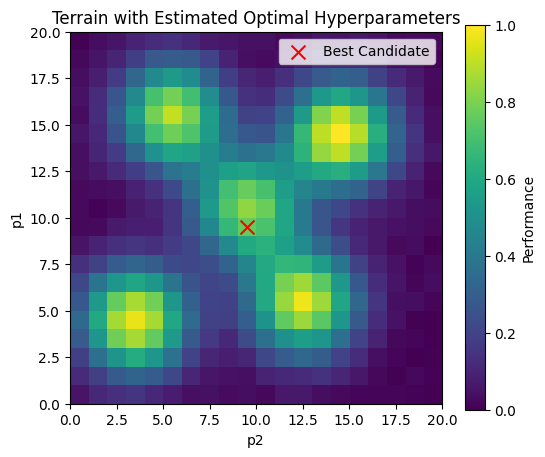

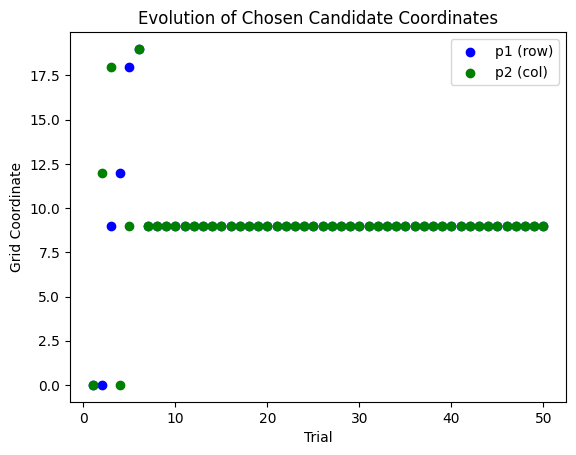

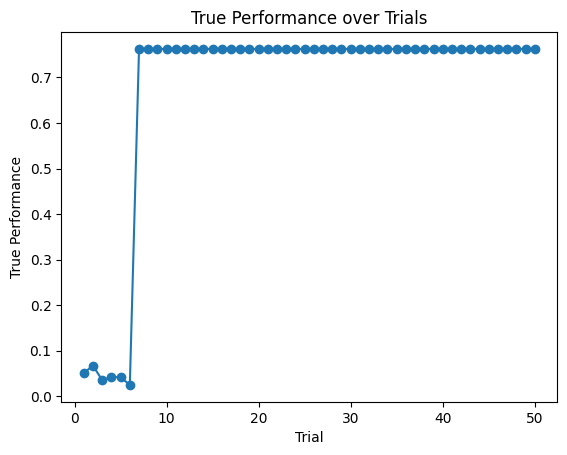

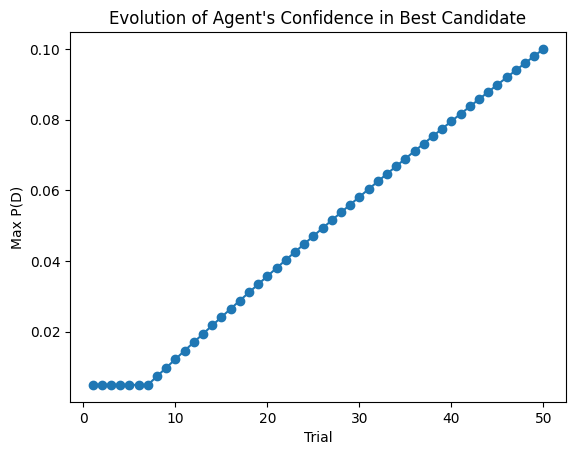

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import logging

# Import the Agent class and helper functions from pymdp.
from pymdp.agent import Agent
from pymdp import utils

logging.basicConfig(level=logging.INFO)

##############################################
# 1. Define the Terrain (Environment)
##############################################
def create_terrain():
    """Create a 20x20 terrain with multiple peaks.

    The terrain is normalized to [0, 1] so that the best possible performance is 1.0.
    """
    np.random.seed(42)
    size = 20
    x = np.arange(size)
    y = np.arange(size)
    X, Y = np.meshgrid(x, y)

    terrain = np.zeros((size, size), dtype=float)
    centers = [(3, 4), (5, 15), (12, 5), (14, 14), (9, 10)]
    amplitudes = [0.78, 0.7, 0.75, 0.8, 0.65]
    sigma = 2.0

    for (cx, cy), amp in zip(centers, amplitudes):
        gauss = amp * np.exp(-((X - cx) ** 2 + (Y - cy) ** 2) / (2 * sigma ** 2))
        terrain += gauss

    # Add a little noise and normalize to [0,1]
    terrain += 0.03 * np.random.rand(size, size)
    min_val, max_val = terrain.min(), terrain.max()
    terrain = (terrain - min_val) / (max_val - min_val)

    logging.info("Terrain created successfully with multiple peaks.")
    return terrain

terrain = create_terrain()
grid_size = terrain.shape[0]
n_states = grid_size * grid_size  # total number of candidates
n_obs = 100  # number of observation bins

##############################################
# 2. Define the “True” Environment Mapping
##############################################
def true_observation(state_index):
    """Given a candidate index, return a noisy observation.

    The observation is an integer bin (0 ... n_obs-1) proportional to performance.
    """
    state_index = int(state_index)
    row = state_index // grid_size
    col = state_index % grid_size
    true_perf = terrain[row, col]  # in [0,1]
    # Add Gaussian noise (std = 0.05); clip to [0,1]
    noise = np.random.normal(loc=0.0, scale=0.05)
    noisy_perf = np.clip(true_perf + noise, 0, 1)
    obs_bin = int(np.clip(np.round(noisy_perf * (n_obs - 1)), 0, n_obs - 1))
    return obs_bin, true_perf

##############################################
# 3. Build the Agent's Generative Model
##############################################
# (a) Observation likelihood (A)
A_matrix = np.ones((n_obs, n_states), dtype=float)
A_matrix = A_matrix / A_matrix.sum(axis=0, keepdims=True)  # normalize each column
A = np.array([A_matrix])  # one modality

# (b) Dirichlet parameters for A (pA)
pA = np.array([np.ones((n_obs, n_states), dtype=float)])

# (c) Transition model (B): deterministic selection.
B_matrix = np.zeros((n_states, n_states, n_states), dtype=float)
for a in range(n_states):
    one_hot = np.zeros(n_states, dtype=float)
    one_hot[a] = 1.0
    for s in range(n_states):
        B_matrix[:, s, a] = one_hot
B = np.array([B_matrix])
# (No learning for B; leave pB as None)

# (d) Prior over hidden states (D) – initially uniform.
D_vector = np.ones(n_states, dtype=float) / n_states
D = np.array([D_vector])
pD = np.array([np.ones(n_states, dtype=float)])  # Dirichlet prior for D

# (e) Prior preferences (C): higher observation bins are preferred.
C_vector = np.linspace(0, 1, n_obs)
C_vector = C_vector / C_vector.sum()  # normalize
C = np.array([C_vector])

##############################################
# 4. Instantiate the Agent
##############################################
agent = Agent(
    A=A,
    B=B,
    C=C,
    D=D,
    pA=pA,
    pD=pD,
    policy_len=1,
    inference_horizon=1,
    inference_algo="VANILLA",
    lr_pA=1.0,
    lr_pD=1.0,
    action_selection="deterministic"
)

##############################################
# 5. Define a Generalized Update for A
##############################################
def update_A_generalized(agent, obs, candidate, sigma=1.5, lr=1.0):
    """
    Update the agent's Dirichlet parameters for A using a Gaussian kernel so that
    an observation at one candidate also influences nearby candidates.
    """
    # Assume the agent's state space is arranged on a grid.
    grid_size = int(np.sqrt(agent.A[0].shape[1]))
    cand_row = candidate // grid_size
    cand_col = candidate % grid_size

    # Copy current Dirichlet parameters for A (for modality 0)
    pA_current = agent.pA[0].copy()  # shape: (n_obs, n_states)

    # Loop over all candidate states (columns)
    for s in range(pA_current.shape[1]):
        row = s // grid_size
        col = s % grid_size
        # Euclidean distance from the observed candidate
        dist = np.sqrt((row - cand_row)**2 + (col - cand_col)**2)
        weight = np.exp(-0.5 * (dist / sigma) ** 2)
        # Add learning signal weighted by the kernel.
        pA_current[obs, s] += lr * weight

    # Update agent's pA and recalc A from it.
    agent.pA[0] = pA_current
    agent.A[0] = pA_current / np.sum(pA_current, axis=0, keepdims=True)

##############################################
# 6. Run the Simulation Loop
##############################################
n_trials = 50
chosen_states = []      # record candidate indices
true_performances = []  # record true performances
obs_bins_record = []    # record observed bins
estimated_scores = []   # record best estimated probability from D

for trial in range(1, n_trials + 1):
    # Sample an action (candidate) based on current beliefs.
    # The agent selects an action (candidate state) based on its current beliefs.
    # (a) Update state beliefs given the latest observation.
    qs = agent.infer_states(observation=current_observation)
    # (b) Infer policies (computes the posterior over policies and expected free energies)
    q_pi, G = agent.infer_policies()
    action = agent.sample_action()  # returns a vector; we have one factor
    candidate = int(action[0])
    chosen_states.append(candidate)

    # Environment returns a noisy observation.
    obs_bin, true_perf = true_observation(candidate)
    true_performances.append(true_perf)
    obs_bins_record.append(obs_bin)

    p1 = candidate // grid_size
    p2 = candidate % grid_size
    print(f"=== Trial {trial} ===")
    print(f"Selected candidate: state {candidate} (grid: p1={p1}, p2={p2})")
    print(f"True performance (score): {true_perf:.4f} -> observation bin: {obs_bin}")

    # Update state beliefs using the new observation.
    agent.infer_states([obs_bin])

    # Update the likelihood mapping (A) with generalization.
    update_A_generalized(agent, obs_bin, candidate, sigma=1.5, lr=1.0)

    # Update the prior D using the current state belief (agent.qs).
    agent.update_D(qs_t0=agent.qs)

    # Record the best estimated probability in D as a proxy for the agent's current best belief.
    estimated_scores.append(np.max(agent.D[0]))

##############################################
# 7. Extract and Plot the Results
##############################################
# The "best" candidate is taken as the one with highest probability in D.
best_candidate = int(np.argmax(agent.D[0]))
best_p1 = best_candidate // grid_size
best_p2 = best_candidate % grid_size
print("\n============================")
print(f"Optimal hyperparameters found: (p1={best_p1}, p2={best_p2}) with estimated score {agent.D[0][best_candidate]:.4f}")

# (a) Plot the terrain with the best candidate marked.
plt.figure(figsize=(6, 5))
plt.imshow(terrain, origin='lower', cmap='viridis', extent=[0, grid_size, 0, grid_size])
plt.colorbar(label='Performance')
plt.scatter(best_p2 + 0.5, best_p1 + 0.5, color='red', s=100, marker='x', label='Best Candidate')
plt.title("Terrain with Estimated Optimal Hyperparameters")
plt.xlabel("p2")
plt.ylabel("p1")
plt.legend()
plt.show()

# (b) Plot the evolution of chosen candidate coordinates.
rows = [s // grid_size for s in chosen_states]
cols = [s % grid_size for s in chosen_states]
plt.figure()
plt.scatter(range(1, n_trials + 1), rows, c='blue', label='p1 (row)')
plt.scatter(range(1, n_trials + 1), cols, c='green', label='p2 (col)')
plt.xlabel("Trial")
plt.ylabel("Grid Coordinate")
plt.legend()
plt.title("Evolution of Chosen Candidate Coordinates")
plt.show()

# (c) Plot the true performance over trials.
plt.figure()
plt.plot(range(1, n_trials + 1), true_performances, marker='o')
plt.xlabel("Trial")
plt.ylabel("True Performance")
plt.title("True Performance over Trials")
plt.show()

# (d) Plot the evolution of the maximum probability in D.
plt.figure()
plt.plot(range(1, n_trials + 1), estimated_scores, marker='o')
plt.xlabel("Trial")
plt.ylabel("Max P(D)")
plt.title("Evolution of Agent's Confidence in Best Candidate")
plt.show()


=== Trial 1 ===
Selected candidate: state 0 (grid: p1=0, p2=0)
True performance (score): 0.0516 -> observation bin: 12
------------------------------------------------------
=== Trial 2 ===
Selected candidate: state 12 (grid: p1=0, p2=12)
True performance (score): 0.0670 -> observation bin: 7
------------------------------------------------------
=== Trial 3 ===
Selected candidate: state 198 (grid: p1=9, p2=18)
True performance (score): 0.0354 -> observation bin: 7
------------------------------------------------------
=== Trial 4 ===
Selected candidate: state 240 (grid: p1=12, p2=0)
True performance (score): 0.0426 -> observation bin: 3
------------------------------------------------------
=== Trial 5 ===
Selected candidate: state 369 (grid: p1=18, p2=9)
True performance (score): 0.0420 -> observation bin: 6
------------------------------------------------------
=== Trial 6 ===
Selected candidate: state 399 (grid: p1=19, p2=19)
True performance (score): 0.0250 -> observation bin: 2
-

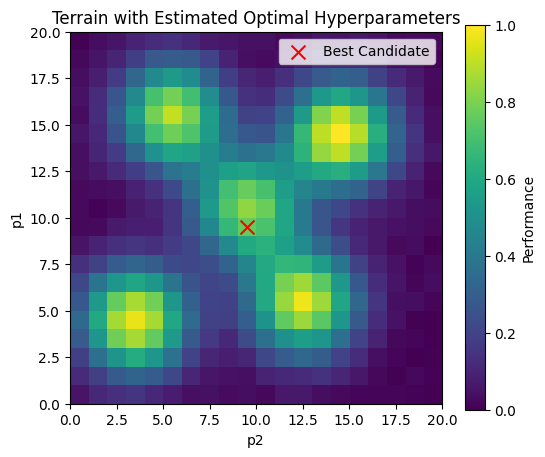

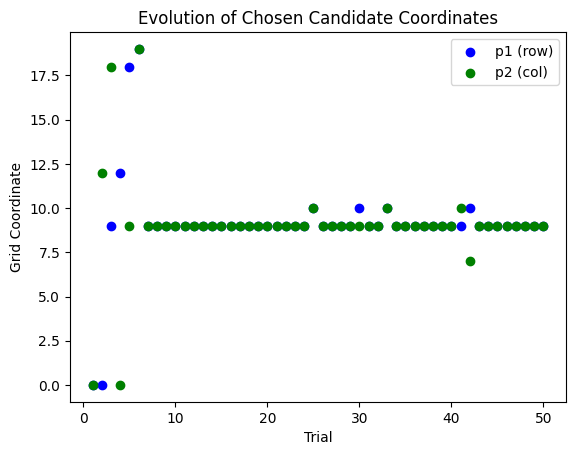

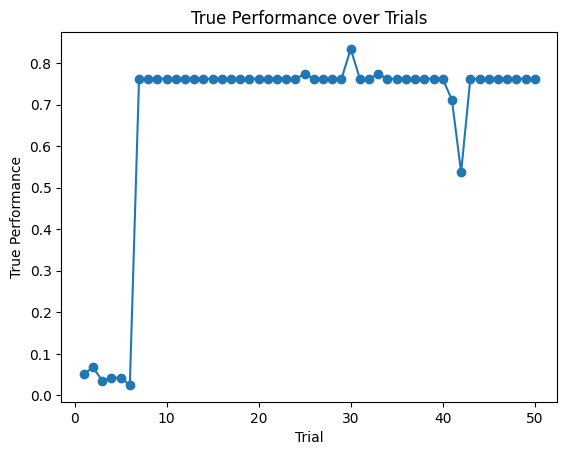

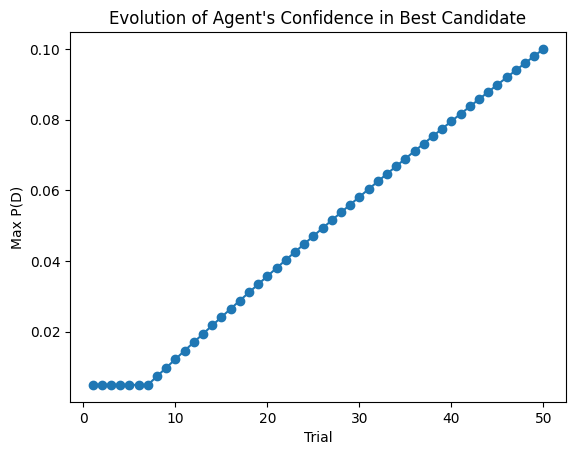

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import logging

# Import the Agent class and helper functions from pymdp.
from pymdp.agent import Agent
from pymdp import utils

logging.basicConfig(level=logging.INFO)

##############################################
# 1. Define the Terrain (Environment)
##############################################
def create_terrain():
    """Create a 20x20 terrain with multiple peaks.

    The terrain is normalized to [0, 1] so that the best possible
    performance is 1.0.
    """
    np.random.seed(42)
    size = 20
    x = np.arange(size)
    y = np.arange(size)
    X, Y = np.meshgrid(x, y)

    terrain = np.zeros((size, size), dtype=float)
    centers = [(3, 4), (5, 15), (12, 5), (14, 14), (9, 10)]
    amplitudes = [0.78, 0.7, 0.75, 0.8, 0.65]
    sigma = 2.0

    for (cx, cy), amp in zip(centers, amplitudes):
        gauss = amp * np.exp(-((X - cx) ** 2 + (Y - cy) ** 2) / (2 * sigma ** 2))
        terrain += gauss

    # Add a little noise and normalize to [0,1]
    terrain += 0.03 * np.random.rand(size, size)
    min_val, max_val = terrain.min(), terrain.max()
    terrain = (terrain - min_val) / (max_val - min_val)

    logging.info("Terrain created successfully with multiple peaks.")
    return terrain

terrain = create_terrain()
grid_size = terrain.shape[0]
n_states = grid_size * grid_size  # total number of candidates
n_obs = 100  # number of observation bins

##############################################
# 2. Define the “True” Environment Mapping
##############################################
def true_observation(state_index):
    """Given a candidate index, return a noisy observation.

    The observation is an integer bin (0 ... n_obs-1) proportional to performance.
    """
    state_index = int(state_index)
    row = state_index // grid_size
    col = state_index % grid_size
    true_perf = terrain[row, col]  # in [0,1]
    # Add Gaussian noise (std = 0.05); clip to [0,1]
    noise = np.random.normal(loc=0.0, scale=0.05)
    noisy_perf = np.clip(true_perf + noise, 0, 1)
    obs_bin = int(np.clip(np.round(noisy_perf * (n_obs - 1)), 0, n_obs - 1))
    return obs_bin, true_perf

##############################################
# 3. Build the Agent's Generative Model
##############################################
# (a) Observation likelihood (A)
A_matrix = np.ones((n_obs, n_states), dtype=float)
A_matrix = A_matrix / A_matrix.sum(axis=0, keepdims=True)  # normalize each column
A = np.array([A_matrix])  # one modality

# (b) Dirichlet parameters for A (pA)
pA = np.array([np.ones((n_obs, n_states), dtype=float)])

# (c) Transition model (B): deterministic candidate selection.
B_matrix = np.zeros((n_states, n_states, n_states), dtype=float)
for a in range(n_states):
    one_hot = np.zeros(n_states, dtype=float)
    one_hot[a] = 1.0
    for s in range(n_states):
        B_matrix[:, s, a] = one_hot
B = np.array([B_matrix])
# (No learning for B; leave pB as None)

# (d) Prior over hidden states (D) – initially uniform.
D_vector = np.ones(n_states, dtype=float) / n_states
D = np.array([D_vector])
pD = np.array([np.ones(n_states, dtype=float)])  # Dirichlet prior for D

# (e) Prior preferences (C): higher observation bins are preferred.
C_vector = np.linspace(0, 1, n_obs)
C_vector = C_vector / C_vector.sum()  # normalize
C = np.array([C_vector])

##############################################
# 4. Instantiate the Agent
##############################################
agent = Agent(
    A=A,
    B=B,
    C=C,
    D=D,
    pA=pA,
    pD=pD,
    policy_len=1,
    inference_horizon=1,
    inference_algo="VANILLA",
    lr_pA=1.0,
    lr_pD=1.0,
    action_selection="deterministic"
)

##############################################
# 5. Generalized A Update Function (with Kernel)
##############################################
def update_A_generalized(agent, obs, candidate, sigma=1.5, lr=1.0):
    """
    Update the agent's Dirichlet parameters for A using a Gaussian kernel.
    An observation at one candidate also influences nearby candidates.
    """
    grid_size = int(np.sqrt(agent.A[0].shape[1]))
    cand_row = candidate // grid_size
    cand_col = candidate % grid_size

    pA_current = agent.pA[0].copy()  # shape: (n_obs, n_states)

    for s in range(pA_current.shape[1]):
        row = s // grid_size
        col = s % grid_size
        dist = np.sqrt((row - cand_row)**2 + (col - cand_col)**2)
        weight = np.exp(-0.5 * (dist / sigma) ** 2)
        pA_current[obs, s] += lr * weight

    agent.pA[0] = pA_current
    agent.A[0] = pA_current / np.sum(pA_current, axis=0, keepdims=True)

##############################################
# 6. Local Exploration Function
##############################################
def sample_local_candidate(best_candidate, grid_size, sigma=1.0):
    """
    Given the current best candidate index, sample a candidate from a Gaussian
    distribution around its (row, col) coordinates.
    """
    row = best_candidate // grid_size
    col = best_candidate % grid_size
    new_row = int(np.clip(np.round(np.random.normal(loc=row, scale=sigma)), 0, grid_size - 1))
    new_col = int(np.clip(np.round(np.random.normal(loc=col, scale=sigma)), 0, grid_size - 1))
    return new_row * grid_size + new_col

##############################################
# 7. Simulation Loop with Occasional Local Exploration
##############################################
n_trials = 50
chosen_states = []      # record candidate indices chosen
true_performances = []  # record true performance values
obs_bins_record = []    # record observed bins
estimated_scores = []   # record maximum probability in D (agent's confidence)

# (Assume that before the loop, the agent, terrain, true_observation,
#  update_A_generalized, sample_local_candidate, and all plotting routines have been defined.)

# For local exploration (optional):
local_explore_start = 25    # start local exploration after trial 25
local_explore_prob = 0.3    # 30% chance to override with a local move

# Initialize current_observation (for the very first trial, use a default observation)
current_observation = [0]

n_trials = 50
chosen_states = []      # record candidate indices chosen
true_performances = []  # record true performance values
obs_bins_record = []    # record observed bins
estimated_scores = []   # record the maximum probability in D (agent's confidence)

for trial in range(1, n_trials + 1):
    # === Inference before selecting an action ===
    # (a) Update state beliefs using the latest observation.
    qs = agent.infer_states(observation=current_observation)
    # (b) Infer policies (compute the posterior over policies and expected free energies).
    q_pi, G = agent.infer_policies()
    # (c) Sample an action based on current beliefs.
    action = agent.sample_action()  # returns a vector; we have one hidden state factor
    candidate = int(action[0])

    # Optionally override with local exploration if criteria are met.
    if trial >= local_explore_start and np.random.rand() < local_explore_prob:
        # Use the current best candidate (from D) as the center for local exploration.
        best_candidate = int(np.argmax(agent.D[0]))
        candidate = sample_local_candidate(best_candidate, grid_size, sigma=1.0)
        print(f"Trial {trial}: Local exploration candidate selected: {candidate}")

    chosen_states.append(candidate)

    # === Environment Interaction ===
    # Get a noisy observation from the environment.
    obs_bin, true_perf = true_observation(candidate)
    true_performances.append(true_perf)
    obs_bins_record.append(obs_bin)

    p1 = candidate // grid_size
    p2 = candidate % grid_size
    print(f"=== Trial {trial} ===")
    print(f"Selected candidate: state {candidate} (grid: p1={p1}, p2={p2})")
    print(f"True performance (score): {true_perf:.4f} -> observation bin: {obs_bin}")

    # === Belief and Model Updates ===
    # Update state beliefs using the new observation.
    agent.infer_states([obs_bin])

    # Update the observation likelihood (A) with generalization.
    update_A_generalized(agent, obs_bin, candidate, sigma=1.5, lr=1.0)

    # Update the prior over states (D) using the current state beliefs.
    agent.update_D(qs_t0=agent.qs)

    # Record the maximum probability in D as a proxy for the agent's confidence.
    estimated_scores.append(np.max(agent.D[0]))

    # Set current_observation for the next trial.
    current_observation = [obs_bin]

    print("------------------------------------------------------")

##############################################
# 8. Extract and Plot the Results
##############################################
# The best candidate is defined as the one with maximum probability in D.
best_candidate = int(np.argmax(agent.D[0]))
best_p1 = best_candidate // grid_size
best_p2 = best_candidate % grid_size
print("\n============================")
print(f"Optimal hyperparameters found: (p1={best_p1}, p2={best_p2}) with estimated score {agent.D[0][best_candidate]:.4f}")

# (a) Plot the terrain with the best candidate marked.
plt.figure(figsize=(6, 5))
plt.imshow(terrain, origin='lower', cmap='viridis', extent=[0, grid_size, 0, grid_size])
plt.colorbar(label='Performance')
plt.scatter(best_p2 + 0.5, best_p1 + 0.5, color='red', s=100, marker='x', label='Best Candidate')
plt.title("Terrain with Estimated Optimal Hyperparameters")
plt.xlabel("p2")
plt.ylabel("p1")
plt.legend()
plt.show()

# (b) Plot the evolution of chosen candidate coordinates.
rows = [s // grid_size for s in chosen_states]
cols = [s % grid_size for s in chosen_states]
plt.figure()
plt.scatter(range(1, n_trials + 1), rows, c='blue', label='p1 (row)')
plt.scatter(range(1, n_trials + 1), cols, c='green', label='p2 (col)')
plt.xlabel("Trial")
plt.ylabel("Grid Coordinate")
plt.legend()
plt.title("Evolution of Chosen Candidate Coordinates")
plt.show()

# (c) Plot the true performance over trials.
plt.figure()
plt.plot(range(1, n_trials + 1), true_performances, marker='o')
plt.xlabel("Trial")
plt.ylabel("True Performance")
plt.title("True Performance over Trials")
plt.show()

# (d) Plot the evolution of the maximum probability in D.
plt.figure()
plt.plot(range(1, n_trials + 1), estimated_scores, marker='o')
plt.xlabel("Trial")
plt.ylabel("Max P(D)")
plt.title("Evolution of Agent's Confidence in Best Candidate")
plt.show()
